In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = 'tao.jpg'
img = cv2.imread(img_path)
img.shape

(960, 1440, 3)

(-0.5, 1439.5, 959.5, -0.5)

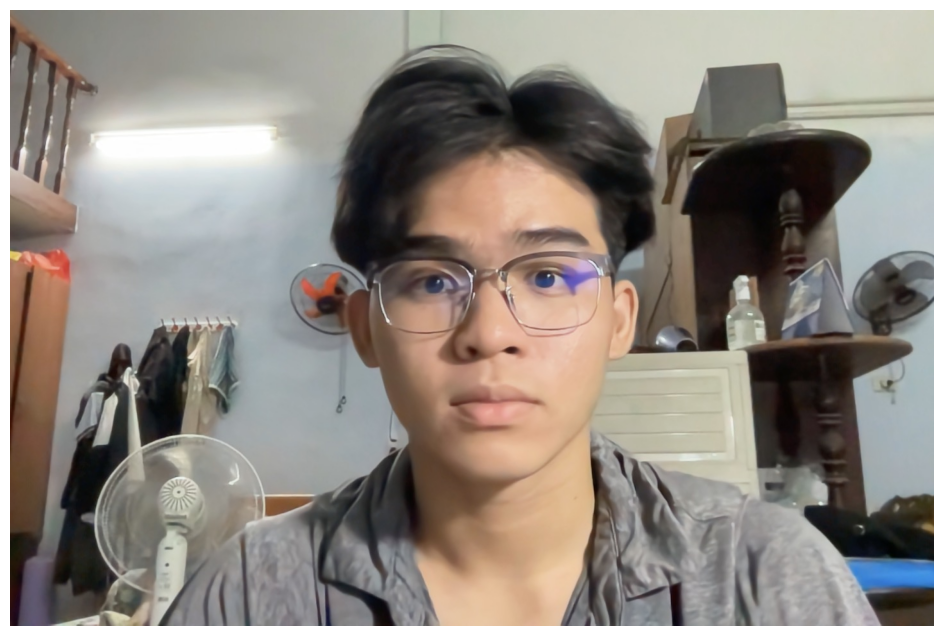

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)
plt.axis('off')

#### FACE DETECTION

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Load the pre-trained Haar Cascade face detector
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt2.xml")
face = face_classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(40,40))
### Drawing the bouding box
for (x,y,w,h) in face:
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 4)

(-0.5, 1439.5, 959.5, -0.5)

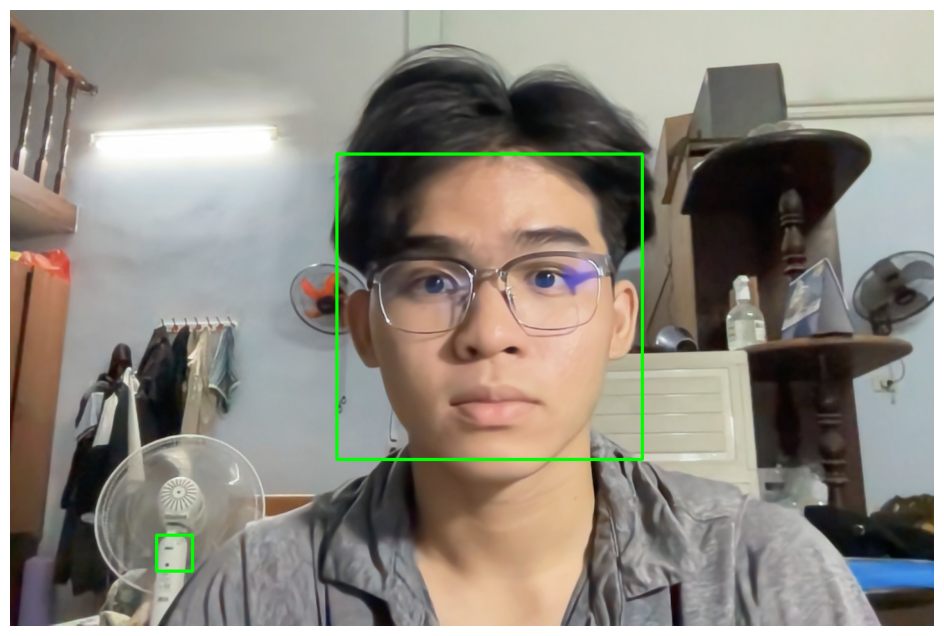

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.imshow(img_rgb)
plt.axis('off')

#### REAL TIME FACE_DETECTION 

In [9]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
video_cap = cv2.VideoCapture(0)
### Identifuing faces in the video stream
#### draw the bouding box
def detect_face (vid):
    gray = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.1,5,minSize=(40,40))
    for (x,y,w,h) in faces:
        cv2.rectangle(vid, (x,y), (x+w, y+h),(0,255,0),4)
    return faces
### Creating a loop for real_time face detection
while True:
    result, video_frame = video_cap.read()
    if result is False:
        break
    faces = detect_face(video_frame)
    cv2.imshow('Face detection', video_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

#### Face Recognition

In [12]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    for (x,y,w,h) in faces:
        print(x,y,w,h)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.imwrite("image_gray.png", roi_gray)
        cv2.imwrite('image_color.png', roi_color)
    cv2.imshow('frame',frame)
    if cv2.waitKey(20)& 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

[ERROR:0@661.887] global persistence.cpp:519 open Can't open file: 'haarcascade_frontalface_alt2.xml' in read mode
OpenCV: Couldn't read video stream from file "VID20240311143159.mp4"
[ERROR:0@661.908] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:274: error: (-215:Assertion failed) number < max_number in function 'icvExtractPattern'




error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
